## Assignment 1

* Compute the reconstruction error for fixed `theta = np.linspace(0., 180., na)` with `na = 400` for various values of `sigma`. Present the results in a graph and table.

* Compute the reconstruction error for fixed `sigma = 0` and varying `na`. Present the results in a graph and table.

We define the reconstuction error between ground truth $\overline{u}$ and reconstruction $\widetilde{u}$ as

$$e = \|\widetilde{u} - \overline{u}\| / \|\overline{u}\|.$$

Draw conclusions about the influence of angular sampling and noise on the reconstruction error. To get you started, we defined a function `reconstruct` which performs the experiment for given `na`, `sigma` and returns the reconstructed image. You can then loop over either `na` or `sigma` and compute the errors. Plotting the results gives some insight in the reconstructions and the errors.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom

def reconstruct(u, na, sigma):
    """
    CT reconstruction of given image with noise and subsampling.

    Input:
        u     - ground truth image, square numpy-array of size (nx,nx)
        na    - number of angles in range [0,180) to use, integer
        sigma - noise level, scalar

    Output:
        u_fbp - reconstructed image, square numpy-array of size (nx,nx)
    """

    # settings
    nx    = u.shape[0]
    theta = np.linspace(0., 180., na)

    # sinogram
    f = radon(u, theta=theta)
    f_noisy = f + sigma * np.random.randn(nx,na)

    # reconstruction
    u_fbp = iradon(f_noisy,theta=theta)

    # return
    return u_fbp

## Fixed Number of Angles and Varying Noise

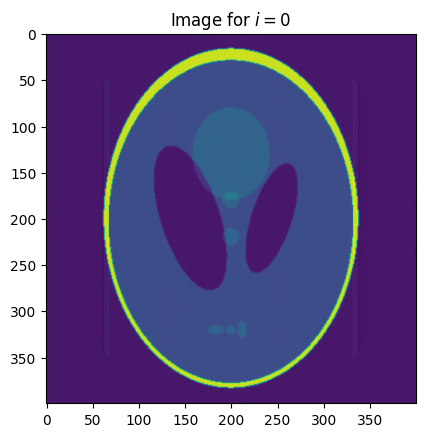

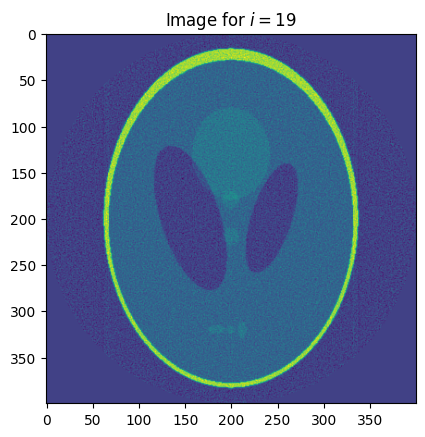

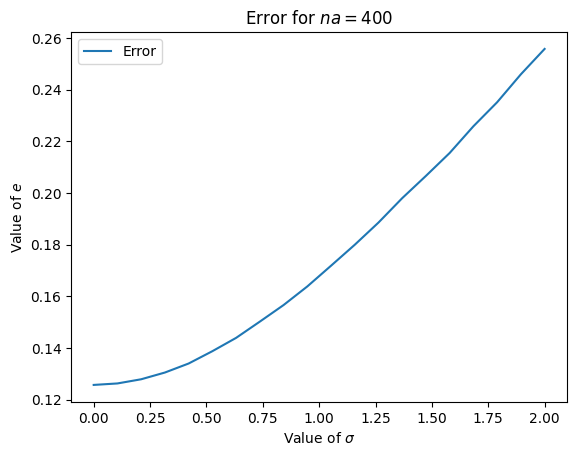

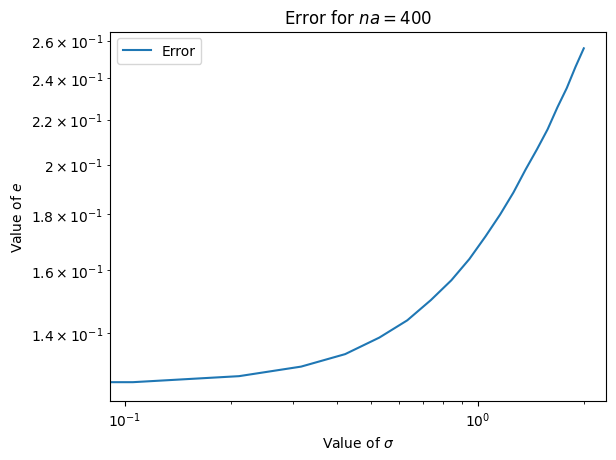

In [7]:
# Number of Samples is Fixed
na = 400

ut = shepp_logan_phantom()
ss = np.linspace(0, 2, 20)
ee = np.empty_like(ss)

for i, sigma in enumerate(ss):
    ur = reconstruct(ut, na, sigma)
    ee[i] = np.linalg.norm(ut - ur) / np.linalg.norm(ut)

    if i == 0 or i == len(ee) - 1:
        plt.imshow(ur)
        plt.title(f"Image for $i = {i}$")
        plt.show()

plt.plot(ss, ee, label="Error")
plt.title("Error for $na = 400$")
plt.xlabel("Value of $\\sigma$")
plt.ylabel("Value of $e$")
plt.legend()
plt.show()

plt.plot(ss, ee, label="Error")
plt.loglog()
plt.title("Error for $na = 400$")
plt.xlabel("Value of $\\sigma$")
plt.ylabel("Value of $e$")
plt.legend()
plt.show()

## No Noise but Varying Number of Samples

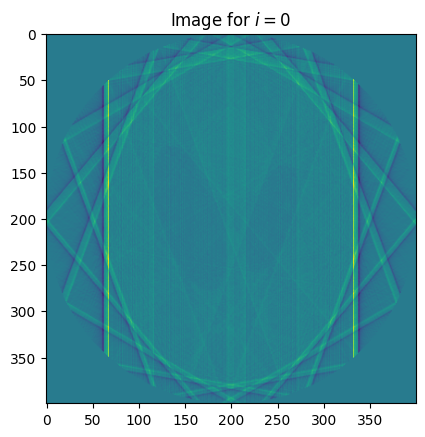

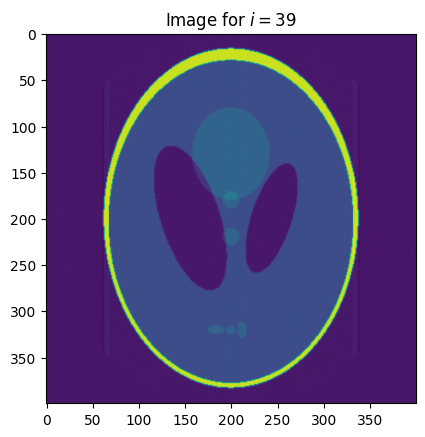

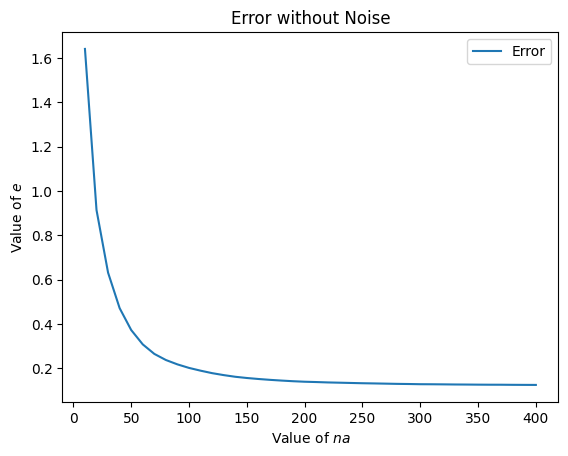

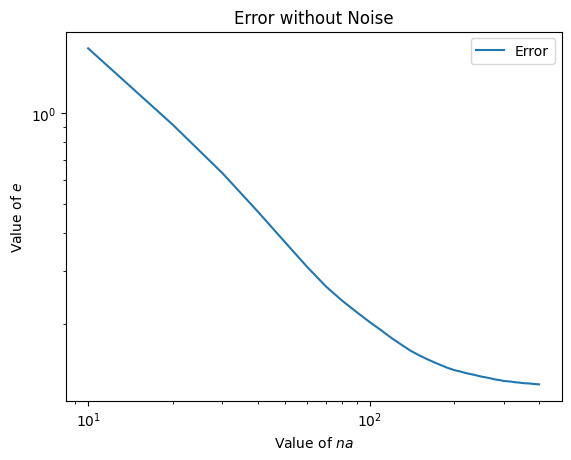

In [8]:
# Number of Samples is Fixed
sigma = 0

ut = shepp_logan_phantom()
nn = np.round(np.linspace(10, 400, 40))
ee = np.empty_like(nn)

for i, na in enumerate(nn):
    ur = reconstruct(ut, int(na), sigma)
    ee[i] = np.linalg.norm(ut - ur) / np.linalg.norm(ut)

    if i == 0 or i == len(ee) - 1:
        plt.imshow(ur)
        plt.title(f"Image for $i = {i}$")
        plt.show()

plt.plot(nn, ee, label="Error")
plt.title("Error without Noise")
plt.xlabel("Value of $na$")
plt.ylabel("Value of $e$")
plt.legend()
plt.show()

plt.plot(nn, ee, label="Error")
plt.loglog()
plt.title("Error without Noise")
plt.xlabel("Value of $na$")
plt.ylabel("Value of $e$")
plt.legend()
plt.show()

# Conclusions

We can see that both noise sources contribute. In both cases we have a regime of decreasing noise and then a noise floor, which probably corresponds to the noise created by the other factor.